# UMATO Test Notebook

This notebook tests the basic functionality of the UMATO package.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, make_swiss_roll, make_s_curve
import umato

print("UMATO version:", umato.__version__)

UMATO version: 0.1.2


## 1. Digits Dataset Test

In [2]:
# Load digits dataset (8x8 = 64 dimensions)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Digits dataset size: {X_digits.shape}")
print(f"Number of classes: {len(np.unique(y_digits))}")

Digits dataset size: (1797, 64)
Number of classes: 10


In [3]:
# Perform dimensionality reduction with UMATO
print("Running UMATO...")
umato_model = umato.UMATO(
    n_neighbors=15,
    hub_num=100
)

X_umato = umato_model.fit_transform(X_digits)
print(f"UMATO result dimensions: {X_umato.shape}")

Running UMATO...


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


UMATO result dimensions: (1797, 2)


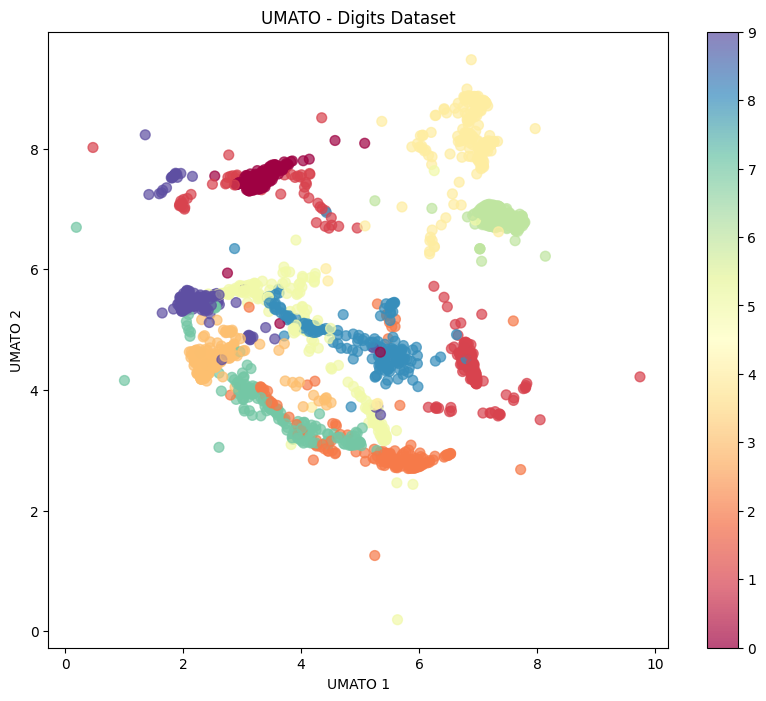

In [4]:
# Visualize results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umato[:, 0], X_umato[:, 1], c=y_digits, cmap='Spectral', s=50, alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title('UMATO - Digits Dataset')
plt.xlabel('UMATO 1')
plt.ylabel('UMATO 2')
plt.show()

## 2. Swiss Roll Dataset Test

Swiss Roll dataset size: (1000, 3)


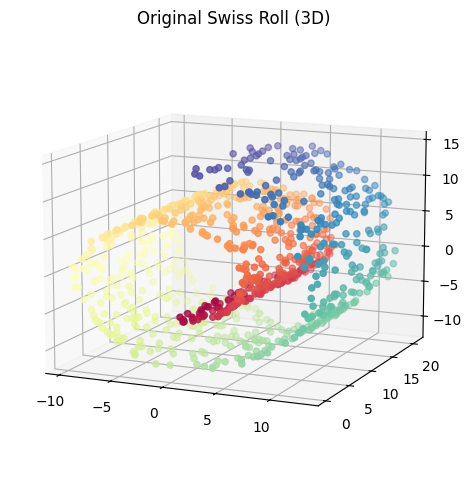

In [5]:
# Generate Swiss Roll dataset
X_swiss, color_swiss = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

print(f"Swiss Roll dataset size: {X_swiss.shape}")

# 3D visualization
fig = plt.figure(figsize=(12, 5))

# Original 3D data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=color_swiss, cmap='Spectral')
ax1.set_title('Original Swiss Roll (3D)')
ax1.view_init(azim=-66, elev=12)

plt.tight_layout()
plt.show()

In [6]:
# Apply UMATO to Swiss Roll dataset
print("Applying UMATO to Swiss Roll...")
umato_swiss = umato.UMATO(
    n_neighbors=10,
    hub_num=200
)

X_swiss_umato = umato_swiss.fit_transform(X_swiss)
print(f"UMATO result dimensions: {X_swiss_umato.shape}")

Applying UMATO to Swiss Roll...
UMATO result dimensions: (1000, 2)


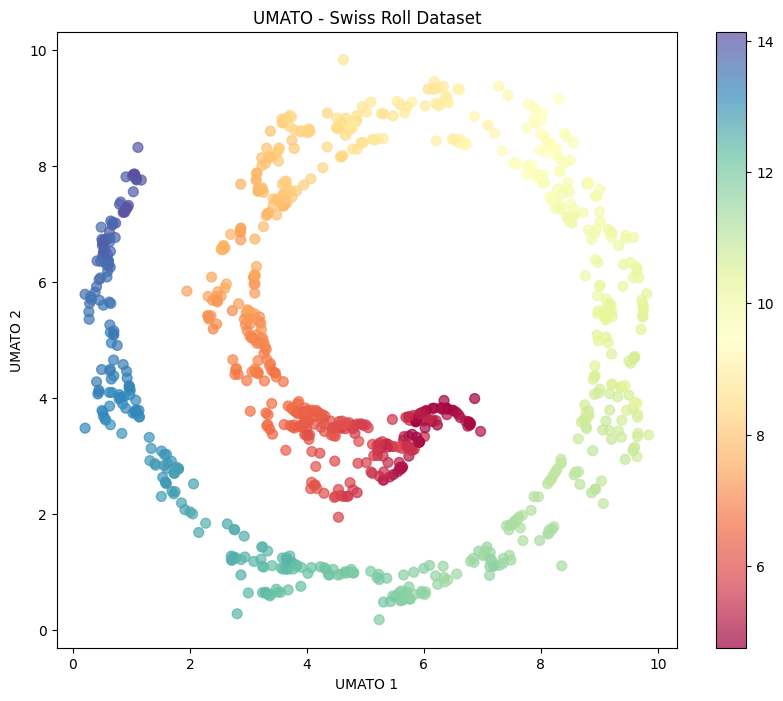

In [7]:
# Visualize Swiss Roll UMATO results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_swiss_umato[:, 0], X_swiss_umato[:, 1], c=color_swiss, cmap='Spectral', s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title('UMATO - Swiss Roll Dataset')
plt.xlabel('UMATO 1')
plt.ylabel('UMATO 2')
plt.show()

## 3. S-Curve Dataset Test

S-Curve dataset size: (1000, 3)


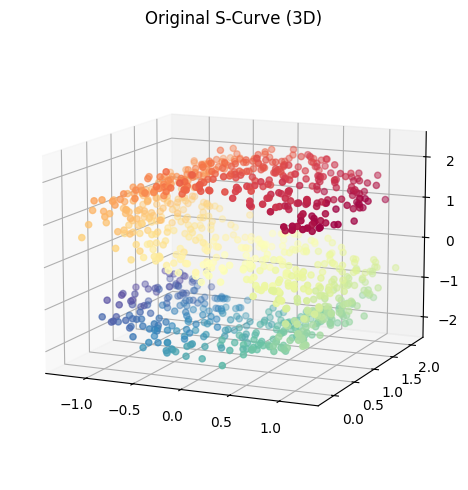

In [8]:
# Generate S-Curve dataset
X_scurve, color_scurve = make_s_curve(n_samples=1000, noise=0.1, random_state=42)

print(f"S-Curve dataset size: {X_scurve.shape}")

# 3D visualization
fig = plt.figure(figsize=(12, 5))

# Original 3D data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_scurve[:, 0], X_scurve[:, 1], X_scurve[:, 2], c=color_scurve, cmap='Spectral')
ax1.set_title('Original S-Curve (3D)')
ax1.view_init(azim=-66, elev=12)

plt.tight_layout()
plt.show()

In [9]:
# Apply UMATO to S-Curve dataset
print("Applying UMATO to S-Curve...")
umato_scurve = umato.UMATO(
    n_neighbors=10,
    hub_num=200
)

X_scurve_umato = umato_scurve.fit_transform(X_scurve)
print(f"UMATO result dimensions: {X_scurve_umato.shape}")

Applying UMATO to S-Curve...
UMATO result dimensions: (1000, 2)


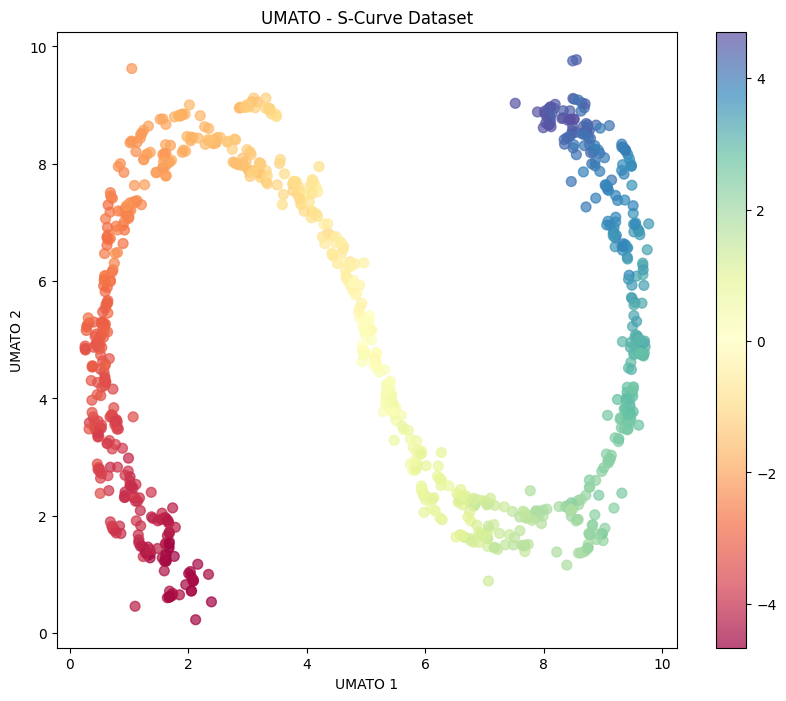

In [10]:
# Visualize S-Curve UMATO results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scurve_umato[:, 0], X_scurve_umato[:, 1], c=color_scurve, cmap='Spectral', s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title('UMATO - S-Curve Dataset')
plt.xlabel('UMATO 1')
plt.ylabel('UMATO 2')
plt.show()

## 4. Parameter Comparison Test

Testing with hub_num=50...
Testing with hub_num=100...
Testing with hub_num=200...


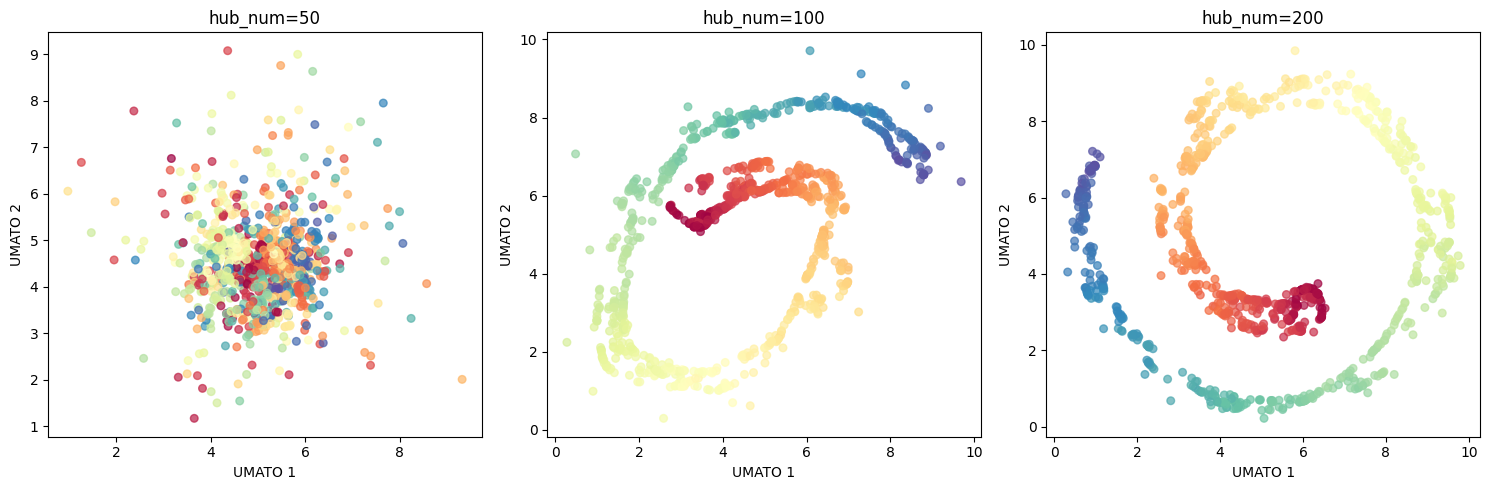

In [11]:
# Test with different hub_num values
hub_nums = [50, 100, 200]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, hub_num in enumerate(hub_nums):
    print(f"Testing with hub_num={hub_num}...")
    
    umato_test = umato.UMATO(
        n_neighbors=15,
        hub_num=hub_num,
        verbose=False  # Reduce output
    )
    
    X_test = umato_test.fit_transform(X_swiss)

    scatter = axes[i].scatter(X_test[:, 0], X_test[:, 1], c=color_swiss, cmap='Spectral', s=30, alpha=0.7)
    axes[i].set_title(f'hub_num={hub_num}')
    axes[i].set_xlabel('UMATO 1')
    axes[i].set_ylabel('UMATO 2')

plt.tight_layout()
plt.show()